<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos. 
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [1]:
# Utilice este espacio para escribir el código.
# Cargamos las librerías a utilizar
import pandas as pd
import numpy as np

pd.read_csv('data/artists.dat', nrows=3 )

,id\tname\turl\tpictureURL
0,1\tMALICE MIZER\thttp://www.last.fm/music/MALI...
1,2\tDiary of Dreams\thttp://www.last.fm/music/D...
2,3\tCarpathian Forest\thttp://www.last.fm/music...


In [2]:
# Cargamos los datos de los artistas
a_cols = ['artistID', 'artistNAME']

artists = pd.read_csv('data/artists.dat', sep='\t', usecols=[0, 1], header=0, names=a_cols)
#encoding='latin-1')

artists.head(3)

,artistID,artistNAME
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest


In [3]:
# Cargamos los datos de usuarios_artistas
ua_cols = ['userID','artistID', 'nro_reproducciones']

user_artists = pd.read_csv('data/user_artists.dat', sep='\t', header=0, names=ua_cols)
#encoding='latin-1')

user_artists.head(3)

,userID,artistID,nro_reproducciones
0,2,51,13883
1,2,52,11690
2,2,53,11351


In [4]:
# Unir las bases
df = pd.merge(user_artists, artists, on='artistID', how='inner')
df.head(3)

,userID,artistID,nro_reproducciones,artistNAME
0,2,51,13883,Duran Duran
1,4,51,228,Duran Duran
2,27,51,85,Duran Duran


In [5]:
df.shape

(92834, 4)

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 2. Análisis preliminar. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?



#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [6]:
# Utilice este espacio para escribir el código.
n_usuarios = df['userID'].nunique()
print('Número de usuarios en la base: ',n_usuarios)
n_artistas = df['artistID'].nunique()
print('Número de artistas en la base: ',n_artistas)

Número de usuarios en la base:  1892
Número de artistas en la base:  17632


In [7]:
# Probabilidad sin ponderar
prob_sin_ponderar_df = df['artistID'].value_counts().reset_index() # contamos el numero de veces que aparece un artista
prob_sin_ponderar_df.columns = ['artistID', 'prob_sin_ponderar']
prob_sin_ponderar_df['prob_sin_ponderar'] = prob_sin_ponderar_df['prob_sin_ponderar']/len(df)

In [8]:
prob_sin_ponderar_df['prob_sin_ponderar'].sum()

1.0

In [9]:
prob_sin_ponderar_df.head()

,artistID,prob_sin_ponderar
0,89,0.006582
1,289,0.005623
2,288,0.005214
3,227,0.005171
4,300,0.005095


In [10]:
# Probabiliada ponderada ORIGINAL
total_reproducciones = df['nro_reproducciones'].sum()  # Total reproducciones
reproducciones_per_artist = df.groupby('artistID')['nro_reproducciones'].sum() # Reproducciones por artista
prob_ponderada = reproducciones_per_artist / total_reproducciones  # Distribución de probabilidad ponderada
prob_ponderada_df = prob_ponderada.reset_index(name='prob_ponderada')

In [11]:
prob_ponderada_df['prob_ponderada'].sum()

1.0

In [12]:
# Unir las distribuciones con el artists df
artists = artists.merge(prob_sin_ponderar_df, on='artistID', how='left')
artists = artists.merge(prob_ponderada_df, on='artistID', how='left')

artists.head(3)

,artistID,artistNAME,prob_sin_ponderar,prob_ponderada
0,1,MALICE MIZER,0.000032,0.000011
1,2,Diary of Dreams,0.000129,0.000116
2,3,Carpathian Forest,0.000032,0.000011


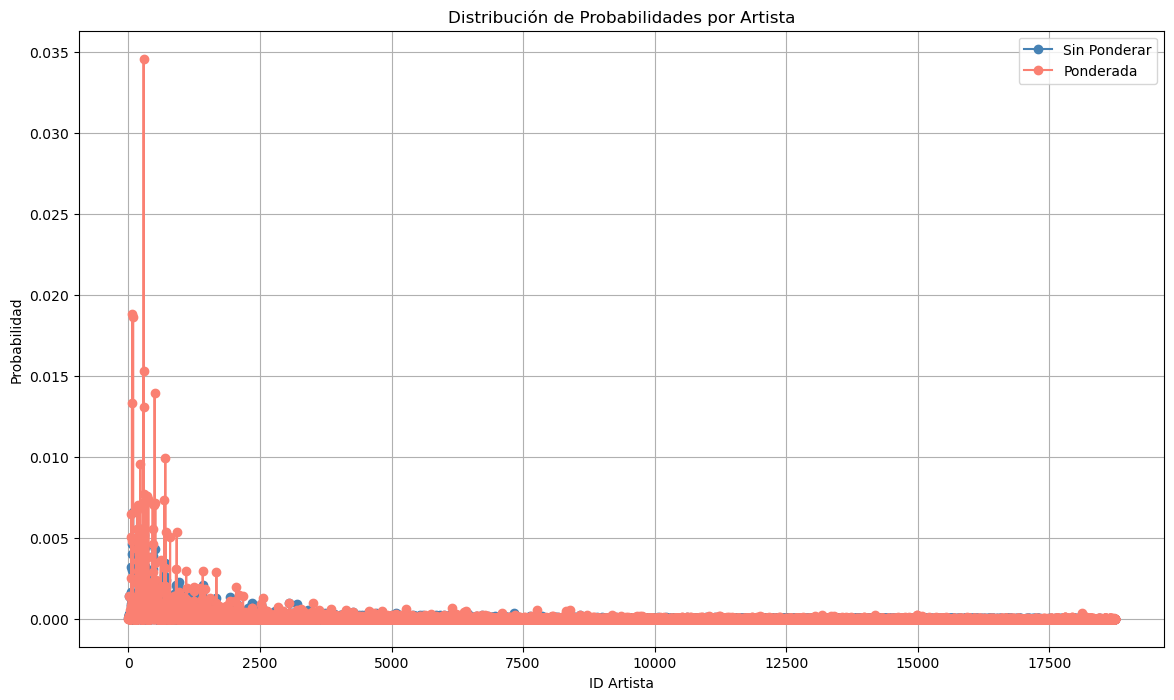

In [13]:
# Comparación probabilidades
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.plot(artists['artistID'], artists['prob_sin_ponderar'], marker='o', label='Sin Ponderar', color='steelblue')
plt.plot(artists['artistID'], artists['prob_ponderada'], marker='o', label='Ponderada', color='salmon')

plt.xlabel('ID Artista')
plt.ylabel('Probabilidad')
plt.title('Distribución de Probabilidades por Artista')
plt.legend()
plt.grid(True)
plt.show()

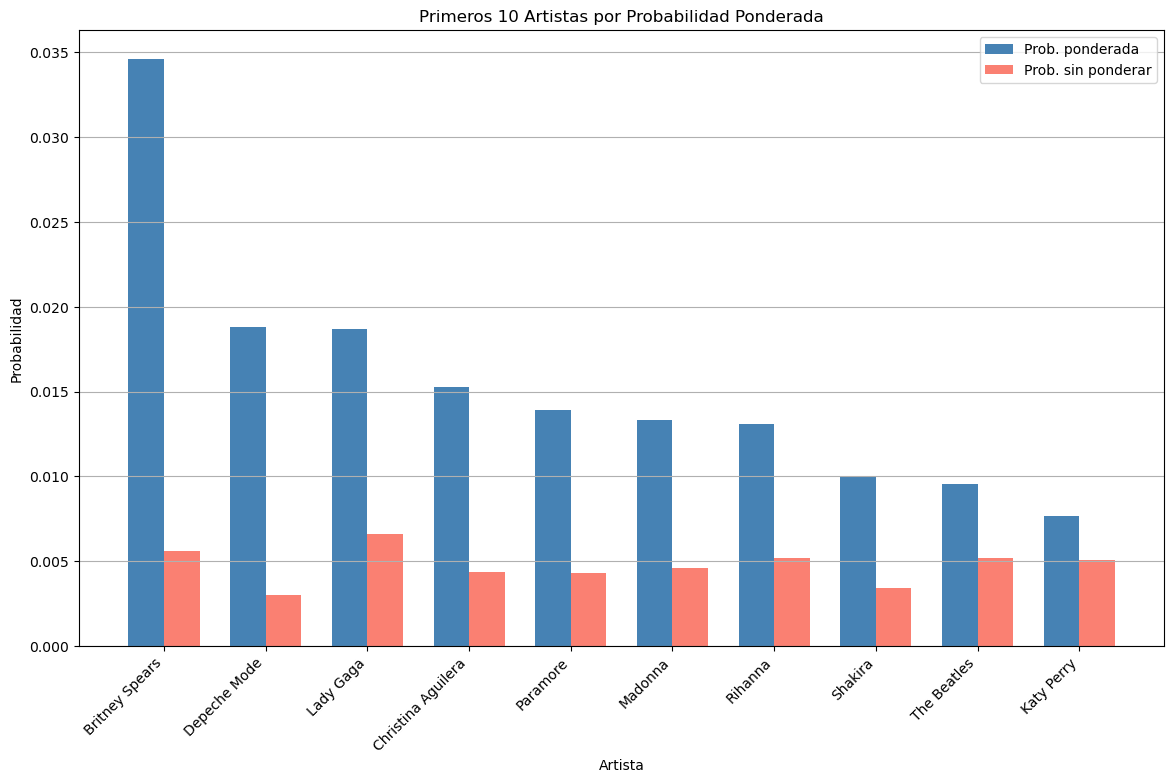

In [14]:
# prob_ponderada en orden descendente y seleccionar los primeros 10
top_10_artists = artists.sort_values(by='prob_ponderada', ascending=False).head(10)

plt.figure(figsize=(14, 8))

# barras agrupadas
bar_width = 0.35
index = range(len(top_10_artists))

# prob_sin_ponderar
plt.bar(index, top_10_artists['prob_ponderada'], bar_width, label='Prob. ponderada', color='steelblue')

# prob_ponderada
plt.bar([i + bar_width for i in index], top_10_artists['prob_sin_ponderar'], bar_width, label='Prob. sin ponderar', color='salmon')

plt.xlabel('Artista')
plt.ylabel('Probabilidad')
plt.title('Primeros 10 Artistas por Probabilidad Ponderada')
plt.xticks([i + bar_width / 2 for i in index], top_10_artists['artistNAME'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y')

plt.show()

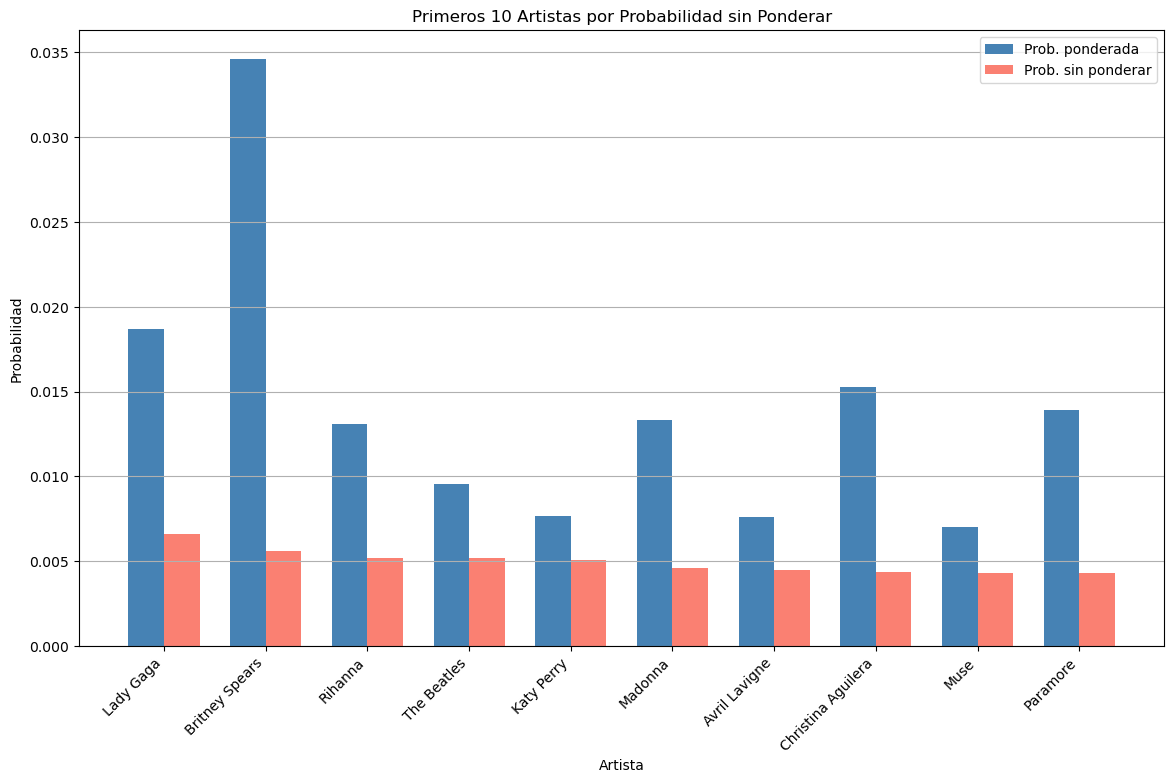

In [15]:
# prob_sin_ponderar en orden descendente y seleccionar los primeros 10
top_10_artists_np = artists.sort_values(by='prob_sin_ponderar', ascending=False).head(10)

plt.figure(figsize=(14, 8))

# Crear gráficos de barras agrupadas
bar_width = 0.35
index = range(len(top_10_artists_np))

# prob_poderada
plt.bar(index, top_10_artists_np['prob_ponderada'], bar_width, label='Prob. ponderada', color='steelblue')

# prob_sin_ponderar
plt.bar([i + bar_width for i in index], top_10_artists_np['prob_sin_ponderar'], bar_width, label='Prob. sin ponderar', color='salmon')

plt.xlabel('Artista')
plt.ylabel('Probabilidad')
plt.title('Primeros 10 Artistas por Probabilidad sin Ponderar')
plt.xticks([i + bar_width / 2 for i in index], top_10_artists_np['artistNAME'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y')

plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


In [16]:
# Utilice este espacio para escribir el código.
df_8 = df[df['userID'] == 8].copy()
df_8.head(3)

,userID,artistID,nro_reproducciones,artistNAME
1975,8,71,181,Dido
2752,8,89,921,Lady Gaga
3453,8,97,354,Duffy


In [17]:
len(df_8)

50

In [18]:
total_reproducciones_8 = df_8['nro_reproducciones'].sum()  # Total reproducciones
df_8.loc[:,'porcentaje rep/total'] = df_8['nro_reproducciones']/total_reproducciones_8
df_8 = df_8.sort_values(by='porcentaje rep/total', ascending=False)
df_8.head(10)

,userID,artistID,nro_reproducciones,artistNAME,porcentaje rep/total
18981,8,334,6291,No Angels,0.173406
18986,8,335,2396,Sandy,0.066044
12634,8,289,2258,Britney Spears,0.062240
18988,8,336,1735,Vanessa Petruo,0.047824
14200,8,295,1425,Beyoncé,0.039279
18989,8,337,1407,Alexander,0.038783
14597,8,296,1039,Sugababes,0.028639
18990,8,338,963,Queensberry,0.026544
2752,8,89,921,Lady Gaga,0.025387
18992,8,339,819,Fady Maalouf,0.022575


In [19]:
df_8['porcentaje rep/total'].sum()

1.0000000000000002

In [20]:
df_8 = df_8.sort_values(by='nro_reproducciones', ascending=False)
df_8.head(10)

,userID,artistID,nro_reproducciones,artistNAME,porcentaje rep/total
18981,8,334,6291,No Angels,0.173406
18986,8,335,2396,Sandy,0.066044
12634,8,289,2258,Britney Spears,0.062240
18988,8,336,1735,Vanessa Petruo,0.047824
14200,8,295,1425,Beyoncé,0.039279
18989,8,337,1407,Alexander,0.038783
14597,8,296,1039,Sugababes,0.028639
18990,8,338,963,Queensberry,0.026544
2752,8,89,921,Lady Gaga,0.025387
18992,8,339,819,Fady Maalouf,0.022575


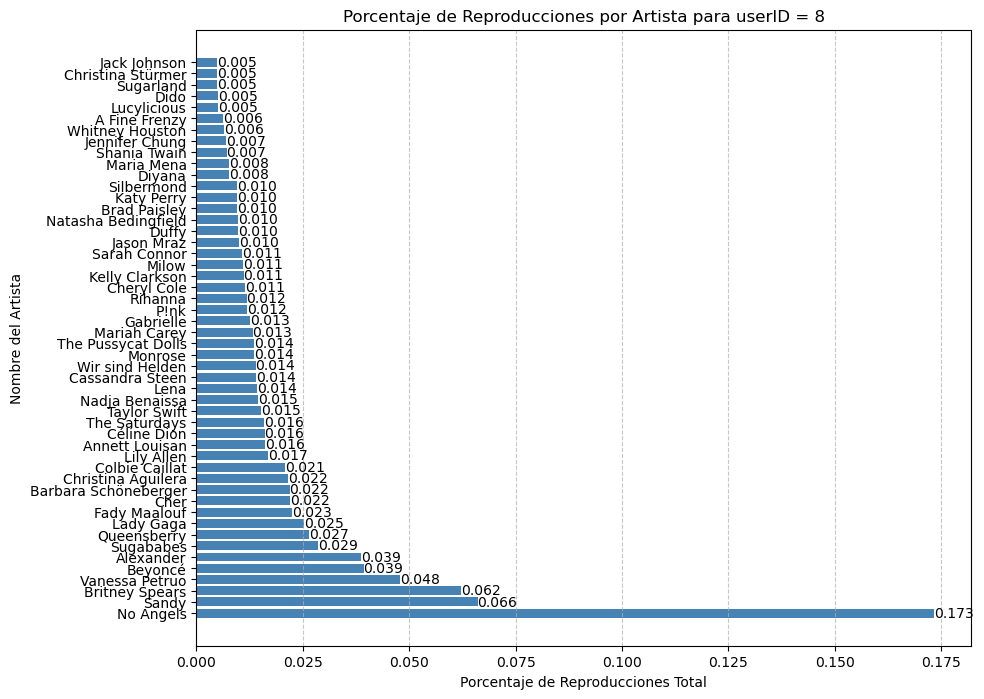

In [21]:
plt.figure(figsize=(10, 8))

plt.barh(df_8['artistNAME'], df_8['porcentaje rep/total'], color='steelblue')

# Configurar etiquetas y título
plt.xlabel('Porcentaje de Reproducciones Total')
plt.ylabel('Nombre del Artista')
plt.title('Porcentaje de Reproducciones por Artista para userID = 8')

# Mostrar los valores en las barras
for index, value in enumerate(df_8['porcentaje rep/total']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [22]:
# Utilice este espacio para escribir el código.
df.head(3)

,userID,artistID,nro_reproducciones,artistNAME
0,2,51,13883,Duran Duran
1,4,51,228,Duran Duran
2,27,51,85,Duran Duran


In [23]:
# Contar el número de userIDs distintos que han escuchado cada artistID
artist_user_counts_df = df.groupby('artistID')['userID'].nunique().reset_index()
artist_user_counts_df.rename(columns={'userID': 'user_count'}, inplace=True)

artist_user_counts_df.head(3)

,artistID,user_count
0,1,3
1,2,12
2,3,3


In [24]:
artist_user_counts_df['promedio_users'] = artist_user_counts_df['user_count']/artist_user_counts_df['user_count'].sum()
artist_user_counts_df = artist_user_counts_df.sort_values(by='promedio_users', ascending=False)
artist_user_counts_df.head(3)

,artistID,user_count,promedio_users
83,89,611,0.006582
283,289,522,0.005623
282,288,484,0.005214


In [25]:
# Unir la cuenta de usuarios de vuelta al DataFrame original
df = df.merge(artist_user_counts_df, on='artistID', how='left')

# Mostrar el DataFrame actualizado
df.head(3)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users
0,2,51,13883,Duran Duran,111,0.001196
1,4,51,228,Duran Duran,111,0.001196
2,27,51,85,Duran Duran,111,0.001196


In [26]:
# df_8 simple
df_8_simple = df[df['userID'] == 8].copy()
df_8_simple = df_8_simple.sort_values(by='promedio_users', ascending=False)
df_8_simple.head(10)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users
2752,8,89,921,Lady Gaga,611,0.006582
12634,8,289,2258,Britney Spears,522,0.005623
12150,8,288,428,Rihanna,484,0.005214
15151,8,300,347,Katy Perry,473,0.005095
13505,8,292,783,Christina Aguilera,407,0.004384
14200,8,295,1425,Beyoncé,397,0.004276
15772,8,302,432,P!nk,305,0.003285
13245,8,291,402,Kelly Clarkson,260,0.002801
19120,8,344,553,Taylor Swift,247,0.002661
14699,8,298,613,Lily Allen,243,0.002618


In [27]:
# Obtener la lista de artistID que el usuario 8 ya tiene en su lista de preferencias de acuerdo a su numero de reps
user8_preferred_artist_ids = df_8['artistID'].unique() # df_8 calculado en el punto 2.3

artist_user_counts_df = artist_user_counts_df.merge(artists[['artistID', 'artistNAME']], on='artistID', how='left')
# Filtrar result_df para excluir estos artistIDs
artist_user_counts_df_filtered = artist_user_counts_df[~artist_user_counts_df['artistID'].isin(user8_preferred_artist_ids)]

recomendations_user_8_promedio_simple = artist_user_counts_df_filtered.head(10)
recomendations_user_8_promedio_simple

,artistID,user_count,promedio_users,artistNAME
3,227,480,0.005171,The Beatles
5,67,429,0.004621,Madonna
6,333,417,0.004492,Avril Lavigne
8,190,400,0.004309,Muse
9,498,399,0.004298,Paramore
11,154,393,0.004233,Radiohead
12,65,369,0.003975,Coldplay
13,466,362,0.003899,Ke$ha
14,701,319,0.003436,Shakira
16,306,304,0.003275,Black Eyed Peas


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


In [28]:
# Utilice este espacio para escribir el código.
df.head(3)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users
0,2,51,13883,Duran Duran,111,0.001196
1,4,51,228,Duran Duran,111,0.001196
2,27,51,85,Duran Duran,111,0.001196


In [29]:
# Contar el número de userIDs distintos que han escuchado cada artistID
nro_repro_counts = df.groupby('artistID')['nro_reproducciones'].sum().reset_index()
artist_prom_repro = nro_repro_counts.copy()
artist_prom_repro.rename(columns={'nro_reproducciones': 'total_artist_rep'}, inplace=True)
artist_prom_repro['prom_rep'] = artist_prom_repro['total_artist_rep']/total_reproducciones
artist_prom_repro.head(3)

,artistID,total_artist_rep,prom_rep
0,1,771,0.000011
1,2,8012,0.000116
2,3,775,0.000011


In [30]:
# Unir la prom_rep al DataFrame original
df = df.merge(artist_prom_repro, on='artistID', how='left')

# Mostrar el DataFrame actualizado
df.head(3)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users,total_artist_rep,prom_rep
0,2,51,13883,Duran Duran,111,0.001196,348919,0.005043
1,4,51,228,Duran Duran,111,0.001196,348919,0.005043
2,27,51,85,Duran Duran,111,0.001196,348919,0.005043


In [31]:
df['prom_user_rep_ponderado'] = df['promedio_users']*df['prom_rep'] 
df.head(3)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users,total_artist_rep,prom_rep,prom_user_rep_ponderado
0,2,51,13883,Duran Duran,111,0.001196,348919,0.005043,0.000006
1,4,51,228,Duran Duran,111,0.001196,348919,0.005043,0.000006
2,27,51,85,Duran Duran,111,0.001196,348919,0.005043,0.000006


In [33]:
artist_ponderado_df = df.groupby('artistID')['prom_user_rep_ponderado'].unique().reset_index()
artist_ponderado_df = artist_ponderado_df.merge(artists[['artistID', 'artistNAME']], on='artistID', how='left')
artist_ponderado_df = artist_ponderado_df.sort_values(by='prom_user_rep_ponderado', ascending=False)
artist_ponderado_df.head(10)

,artistID,prom_user_rep_ponderado,artistNAME
283,289,[0.0001945028790740446],Britney Spears
83,89,[0.00012285279623151666],Lady Gaga
282,288,[6.823140425893239e-05],Rihanna
286,292,[6.707083566849638e-05],Christina Aguilera
61,67,[6.153152857032972e-05],Madonna
492,498,[5.9853431098781074e-05],Paramore
66,72,[5.713689469304975e-05],Depeche Mode
221,227,[4.948376611000471e-05],The Beatles
294,300,[3.921975511561863e-05],Katy Perry
695,701,[3.419797144907949e-05],Shakira


In [34]:
artist_ponderado_df['prom_user_rep_ponderado'] = artist_ponderado_df['prom_user_rep_ponderado'].astype(float)

In [35]:
artist51_data = artist_ponderado_df[artist_ponderado_df['artistID'] == 51]

# Mostrar los datos encontrados
print(artist51_data)

    artistID  prom_user_rep_ponderado   artistNAME
45        51                 0.000006  Duran Duran


In [38]:
# Resultados recomendacion
# Filtrar result_df para excluir estos artistIDs
artist_ponderado_df_filtered = artist_ponderado_df[~artist_ponderado_df['artistID'].isin(user8_preferred_artist_ids)]

recomendations_user_8_promedio_ponderado = artist_ponderado_df_filtered.head(10)
recomendations_user_8_promedio_ponderado

,artistID,prom_user_rep_ponderado,artistNAME
61,67,0.000062,Madonna
492,498,0.000060,Paramore
66,72,0.000057,Depeche Mode
221,227,0.000049,The Beatles
695,701,0.000034,Shakira
327,333,0.000034,Avril Lavigne
184,190,0.000030,Muse
148,154,0.000024,Radiohead
455,461,0.000022,Miley Cyrus
460,466,0.000022,Ke$ha


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [39]:
# Utilice este espacio para escribir el código.
df.head(3)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users,total_artist_rep,prom_rep,prom_user_rep_ponderado
0,2,51,13883,Duran Duran,111,0.001196,348919,0.005043,0.000006
1,4,51,228,Duran Duran,111,0.001196,348919,0.005043,0.000006
2,27,51,85,Duran Duran,111,0.001196,348919,0.005043,0.000006


In [41]:
# Total de reproducciones para cada usuario
rep_usuario = df.groupby('userID')['nro_reproducciones'].transform('sum')
# Calculo del promedio ponderado de cada artista para cada usuario
df['prom_ponderado_usuario'] = df['nro_reproducciones'] / rep_usuario

df.head(3)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users,total_artist_rep,prom_rep,prom_user_rep_ponderado,prom_ponderado_usuario
0,2,51,13883,Duran Duran,111,0.001196,348919,0.005043,0.000006,0.082276
1,4,51,228,Duran Duran,111,0.001196,348919,0.005043,0.000006,0.008466
2,27,51,85,Duran Duran,111,0.001196,348919,0.005043,0.000006,0.014814


In [43]:
r_matrix = df.pivot_table(values='nro_reproducciones', index='userID', columns='artistID') # Ojo corregir JOHANNA
r_matrix.head()

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
r_matrix.shape

(1892, 17632)

In [45]:
total_nans = r_matrix.isna().sum().sum()

In [46]:
total_nans

33266910

In [47]:
(r_matrix.shape[0]*r_matrix.shape[1])-total_nans  

92834

In [48]:
r_matrix_dummy = r_matrix.copy().fillna(0)
r_matrix_dummy.head()

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Importamos cosine_similarity 
from sklearn.metrics.pairwise import cosine_similarity

#Calculamos la similitud de coseno 
cosine_sim = cosine_similarity(r_matrix_dummy, r_matrix_dummy)

# Transformamos la matriz resultante en un dataframe
cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix.index, columns=r_matrix.index)

cosine_sim.head(10) 

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
userID,,,,,,,,,,,,,,,,,,,,,
2,1.000000,0.0,0.144786,0.028692,0.007016,0.030219,0.008964,0.0,0.000000,0.021267,...,0.000000,0.043405,0.000000,0.004625,0.001585,0.0,0.000956,0.082134,0.000000,0.0
3,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000318,0.0
4,0.144786,0.0,1.000000,0.081193,0.006609,0.000000,0.000000,0.0,0.009072,0.013407,...,0.000000,0.000000,0.003776,0.006178,0.000000,0.0,0.045125,0.659085,0.000000,0.0
5,0.028692,0.0,0.081193,1.000000,0.000000,0.000000,0.000000,0.0,0.169078,0.004639,...,0.010993,0.000000,0.205141,0.000000,0.000000,0.0,0.204557,0.119133,0.000000,0.0
6,0.007016,0.0,0.006609,0.000000,1.000000,0.012713,0.018881,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
7,0.030219,0.0,0.000000,0.000000,0.012713,1.000000,0.167416,0.0,0.000000,0.247062,...,0.000000,0.001678,0.000000,0.000000,0.017636,0.0,0.000000,0.000000,0.000000,0.0
8,0.008964,0.0,0.000000,0.000000,0.018881,0.167416,1.000000,0.0,0.000000,0.187304,...,0.000000,0.000000,0.000000,0.000000,0.034826,0.0,0.000000,0.000000,0.000000,0.0
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,0.048289,0.000000,0.000000,0.000000,0.022935,0.0,0.000000,0.000000,0.005969,0.0
10,0.000000,0.0,0.009072,0.169078,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.008895,0.000000,0.109260,0.000000,0.000000,0.0,0.057869,0.110738,0.000000,0.0


In [50]:
promedio_reps = df['nro_reproducciones'].mean()
promedio_pond_usuarios = df['prom_user_rep_ponderado'].mean()

In [51]:
promedio_reps

745.2439300256372

In [52]:
def cf_user_wmean(userID, artistID):
    
    # Primero verificamos si la película esta en la matriz
    if artistID in r_matrix:
        #Buscamos las medidas de similitud con los otros usuarios
        sim_scores = cosine_sim[userID]
        #print("sim scores :", sim_scores) # REMOVER
        # Obtenemos los promedios ponderados de reproducciones no faltantes de la matriz bajo evaluación
        m_prom_rep = r_matrix[artistID]
        #print("m_prom_rep :", m_prom_rep) # REMOVER
        # Obtenemos los índicies de los artistas sin promedio ponderado de reproducciones 
        idx = m_prom_rep[m_prom_rep.isnull()].index
        #print("idx sin pormedio ponderado de reproduccion :", idx) # REMOVER
        # Nos quedamos con similitudes y ratings completos
        sim_scores = sim_scores.drop(idx)
        #print("sim scores :", sim_scores) # REMOVER
        m_prom_rep = m_prom_rep.dropna()
        #print("m_prom_rep :", m_prom_rep) # REMOVER
        
        if sim_scores.sum()>0 :
            # Calculamos la media ponderada
            wmean_prom_rep = np.dot(sim_scores, m_prom_rep)/ sim_scores.sum()
        else:
            wmean_prom_rep = 0 
    else:
        # Si no tenemos ninguna información retornamos 
        wmean_prom_rep = promedio_reps # calculado en 3.2
    
    return wmean_prom_rep

In [54]:
df_8_ponderado = df[df['userID'] == 8].copy()
df_8_ponderado= df_8_ponderado.sort_values(by='prom_user_rep_ponderado', ascending=False)
df_8_ponderado.head(10)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users,total_artist_rep,prom_rep,prom_user_rep_ponderado,prom_ponderado_usuario
12634,8,289,2258,Britney Spears,522,0.005623,2393140,0.034591,0.000195,0.062240
2752,8,89,921,Lady Gaga,611,0.006582,1291387,0.018666,0.000123,0.025387
12150,8,288,428,Rihanna,484,0.005214,905423,0.013087,0.000068,0.011797
13505,8,292,783,Christina Aguilera,407,0.004384,1058405,0.015298,0.000067,0.021583
15151,8,300,347,Katy Perry,473,0.005095,532545,0.007698,0.000039,0.009565
14200,8,295,1425,Beyoncé,397,0.004276,499318,0.007217,0.000031,0.039279
19120,8,344,553,Taylor Swift,247,0.002661,525292,0.007593,0.000020,0.015243
11423,8,257,479,Mariah Carey,241,0.002596,384307,0.005555,0.000014,0.013203
13245,8,291,402,Kelly Clarkson,260,0.002801,253027,0.003657,0.000010,0.011081
15772,8,302,432,P!nk,305,0.003285,207761,0.003003,0.000010,0.011908


In [55]:
df_8_ponderado.tail(10)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users,total_artist_rep,prom_rep,prom_user_rep_ponderado,prom_ponderado_usuario
19637,8,351,456,Gabrielle,2,0.000022,739,0.000011,2.301240e-10,0.012569
18989,8,337,1407,Alexander,1,0.000011,1407,0.000020,2.190693e-10,0.038783
19381,8,347,505,Cassandra Steen,2,0.000022,633,0.000009,1.971157e-10,0.013920
18992,8,339,819,Fady Maalouf,1,0.000011,819,0.000012,1.275180e-10,0.022575
19048,8,341,794,Barbara Schöneberger,1,0.000011,794,0.000011,1.236255e-10,0.021886
19367,8,345,527,Nadja Benaissa,1,0.000011,527,0.000008,8.205368e-11,0.014526
19869,8,358,280,Diyana,1,0.000011,280,0.000004,4.359588e-11,0.007718
19930,8,361,253,Jennifer Chung,1,0.000011,253,0.000004,3.939199e-11,0.006974
19967,8,363,185,Lucylicious,1,0.000011,185,0.000003,2.880442e-11,0.005099
19976,8,365,177,Christina Stürmer,1,0.000011,177,0.000003,2.755882e-11,0.004879


In [56]:
user_51_pred = cf_user_wmean(8, 3)
user_51_pred

0

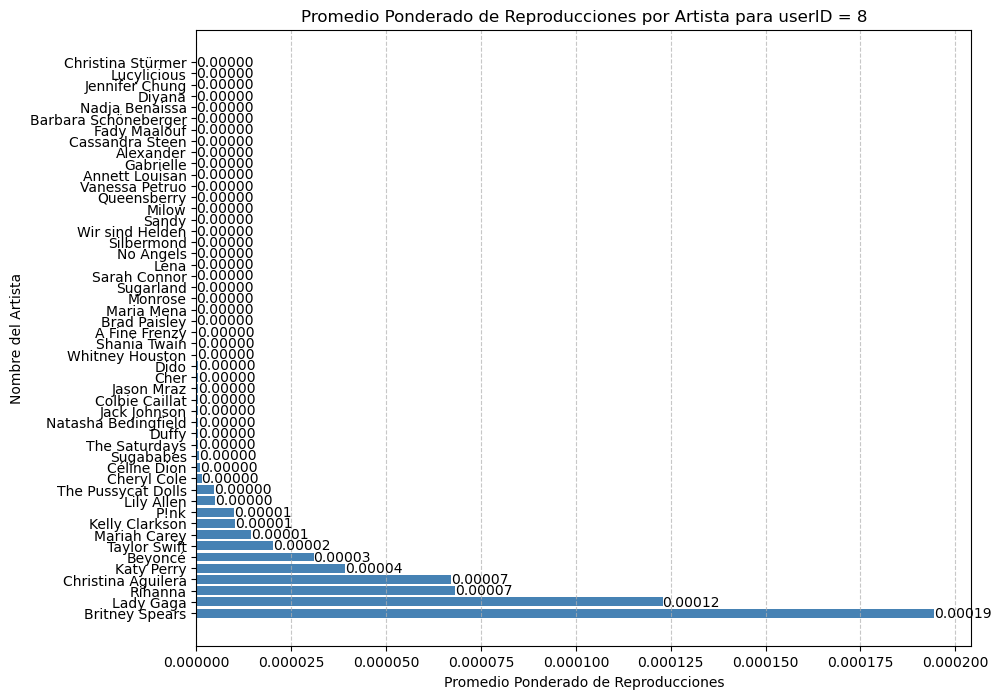

In [58]:
plt.figure(figsize=(10, 8))

plt.barh(df_8_ponderado['artistNAME'], df_8_ponderado['prom_user_rep_ponderado'], color='steelblue')

# Configurar etiquetas y título
plt.xlabel('Promedio Ponderado de Reproducciones')
plt.ylabel('Nombre del Artista')
plt.title('Promedio Ponderado de Reproducciones por Artista para userID = 8')

# Mostrar los valores en las barras
for index, value in enumerate(df_8_ponderado['prom_user_rep_ponderado']):
    plt.text(value, index, f'{value:.5f}', va='center', ha='left')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [59]:
user_51_pred_shakira = cf_user_wmean(8, 701)
user_51_pred_shakira

1330.5109197088348

In [60]:
# calculo predicciones user 8
artists.head(3)

,artistID,artistNAME,prob_sin_ponderar,prob_ponderada
0,1,MALICE MIZER,0.000032,0.000011
1,2,Diary of Dreams,0.000129,0.000116
2,3,Carpathian Forest,0.000032,0.000011


In [61]:
# calculo de user_wmean para todos los artistas
artists_user8 = artists.copy()
user_id = 8  

# Aplicar la función a cada artista
artists_user8['cf_wmean_result'] = artists_user8['artistID'].apply(lambda artistID: cf_user_wmean(user_id, artistID))

result_df = artists_user8[['artistID', 'artistNAME', 'cf_wmean_result']]
result_df = result_df.sort_values(by='cf_wmean_result', ascending=False)

result_df.head(10)

,artistID,artistNAME,cf_wmean_result
8115,8308,Johnny Hallyday,32990.000000
6241,6373,Tyler Adam,30614.000000
17093,18121,Rytmus,23462.000000
1532,1541,The Devil Wears Prada,17097.666227
1182,1191,Hadouken!,13330.754741
2632,2652,The Classic Crime,12754.274950
9130,9363,X-Ray Dog,12091.000000
17094,18122,Kontrafakt,10726.000000
8173,8366,Holdcut,10574.000000
8088,8281,RoBERT,9615.000000


In [62]:
# Filtrar result_df para excluir estos artistas preferidos usuario 8
result_df_filtered = result_df[~result_df['artistID'].isin(user8_preferred_artist_ids)]

recomendations_user_8_cos = result_df_filtered.head(10)
recomendations_user_8_cos

,artistID,artistNAME,cf_wmean_result
8115,8308,Johnny Hallyday,32990.000000
6241,6373,Tyler Adam,30614.000000
17093,18121,Rytmus,23462.000000
1532,1541,The Devil Wears Prada,17097.666227
1182,1191,Hadouken!,13330.754741
2632,2652,The Classic Crime,12754.274950
9130,9363,X-Ray Dog,12091.000000
17094,18122,Kontrafakt,10726.000000
8173,8366,Holdcut,10574.000000
8088,8281,RoBERT,9615.000000


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [64]:
# Utilice este espacio para escribir el código. JOHANNA
A_df = df.pivot(index = 'userID', columns ='artistID', values = 'nro_reproducciones').fillna(0)
A_df.head(3)

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
A = A_df.to_numpy()
user_count_ponderado_mean = np.mean(A, axis = 1)
A_demeaned = A - user_count_ponderado_mean.reshape(-1, 1)

In [66]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(A_demeaned, k = 50)

In [67]:
U.shape

(1892, 50)

In [68]:
sigma.shape

(50,)

In [69]:
Vt.shape

(50, 17632)

In [70]:
sigma = np.diag(sigma)
A_recomendaciones = np.dot(np.dot(U, sigma), Vt)

In [71]:
A_recomendaciones = np.dot(np.dot(U, sigma), Vt) + user_count_ponderado_mean.reshape(-1, 1)

In [72]:
A_recomendaciones_df = pd.DataFrame(A_recomendaciones, index=A_df.index, columns=A_df.columns)
A_recomendaciones_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,3.662287,6.031321,3.801433,3.885595,3.757917,0.605801,103.699931,3.231338,2.133174,3.922073,...,3.959582,3.906134,3.880667,3.875808,3.865923,3.862740,3.861567,3.860394,3.860227,3.968843
3,1.179475,1.181821,1.179390,1.179072,1.180548,1.171197,0.509320,1.142359,1.174457,1.188696,...,1.179860,1.179675,1.179587,1.179570,1.179536,1.179525,1.179521,1.179517,1.179516,1.180229
4,0.891694,0.919519,0.701617,0.710352,0.794057,0.825344,16.935189,0.809258,3.400045,1.691389,...,0.721904,0.714447,0.710893,0.710215,0.708836,0.708392,0.708228,0.708064,0.708041,0.872522
5,0.120354,0.398245,0.104811,0.130828,0.266711,0.668351,15.339577,0.278009,4.012523,2.493170,...,0.133017,0.122271,0.117151,0.116174,0.114187,0.113547,0.113311,0.113075,0.113042,0.453506
6,0.049463,0.045931,0.049044,0.049238,0.048905,0.046933,0.118466,0.048436,0.042127,0.045469,...,0.048829,0.048920,0.048963,0.048972,0.048989,0.048994,0.048996,0.048998,0.048998,0.048693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.280636,0.280890,0.280608,0.280518,0.280742,0.279430,0.166100,0.270434,0.277839,0.281222,...,0.280666,0.280641,0.280630,0.280628,0.280623,0.280622,0.280621,0.280621,0.280621,0.280745
2096,1.151732,2.426812,1.085440,1.213887,1.807634,3.403118,80.130120,1.096410,20.754139,11.593635,...,1.218429,1.168337,1.144468,1.139915,1.130650,1.127666,1.126567,1.125468,1.125311,2.570861
2097,0.383507,0.529306,0.301907,0.307732,0.397720,0.736814,21.615883,0.950402,1.860632,1.099946,...,0.311436,0.307531,0.305670,0.305315,0.304593,0.304360,0.304274,0.304189,0.304177,0.456833


In [76]:
user_id = 8
recomendaciones_svd = A_recomendaciones_df.loc[user_id]

# Filtrar artistas que el usuario ya ha escuchado

recomendaciones_svd = recomendaciones_svd[~recomendaciones_svd.index.isin(user8_preferred_artist_ids)]

# Ordenar las recomendaciones y seleccionar las 10 mejores
top_10_svd = recomendaciones_svd.sort_values(ascending=False).head(10)

# Convertir a DataFrame para combinar con nombres de artistas
top_10_svd = top_10_svd.reset_index()
top_10_svd.columns = ['artistID', 'predicted_reproduction']

# Unir con el DataFrame de artistas para obtener los nombres
top_10_svd = pd.merge(top_10_svd, artists, on='artistID')

# Seleccionar las columnas deseadas y ordenar por la predicción
top_10_svd = top_10_svd[['artistID', 'artistNAME', 'predicted_reproduction']]

# Mostrar las 10 recomendaciones con nombre del artista
top_10_svd

,artistID,artistNAME,predicted_reproduction
0,466,Ke$ha,290.565513
1,55,Kylie Minogue,265.189724
2,161,Enrique Iglesias,200.743333
3,294,Leona Lewis,186.200441
4,306,Black Eyed Peas,122.385493
5,157,Michael Jackson,116.655896
6,1459,Carrie Underwood,103.512645
7,913,Destiny's Child,98.511190
8,314,Ciara,97.729237
9,299,Jennifer Lopez,95.900912


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hiper-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [80]:
# Utilice este espacio para escribir el código.

In [82]:
from apyori import apriori

records = []
for i in df['userID'].unique():
    records.append(list(df[df['userID'] == i]['artistNAME'].values))

records[1]

['Duran Duran',
 'Air',
 'Röyksopp',
 'Coldplay',
 'Moby',
 'Depeche Mode',
 'George Michael',
 'Deep Forest',
 'Porcupine Tree',
 'De/Vision',
 'Radiohead',
 'Robbie Williams',
 'VAST',
 'Michael Jackson',
 'עברי לידר',
 'The Cure',
 'אביב גפן',
 'Enrique Iglesias',
 'God Is an Astronaut',
 'Pink Floyd',
 'יוני בלוך',
 'Planet Funk',
 'The Cranberries',
 'Scissor Sisters',
 'דניאל סלומון',
 'אביתר בנאי',
 'Mew',
 'Stereophonics',
 'Garbage',
 'Placebo',
 'Infected Mushroom',
 'Delerium',
 'Scorpions',
 'Rock Star Supernova',
 "Dolores O'Riordan",
 'Tommy Lee',
 'Roxette',
 'Paradise Lost',
 'Keane',
 'Jamiroquai',
 'James Blunt',
 'Reamonn',
 'Blackfield',
 'a-ha',
 'Opeth',
 'Poets of the Fall',
 'Muse',
 'OneRepublic',
 'Elton John',
 'Tears for Fears']

In [83]:
artists.head(3)

,artistID,artistNAME,prob_sin_ponderar,prob_ponderada
0,1,MALICE MIZER,0.000032,0.000011
1,2,Diary of Dreams,0.000129,0.000116
2,3,Carpathian Forest,0.000032,0.000011


In [84]:
artists_sorted = artists.sort_values(by='prob_ponderada', ascending=False)
print(artists_sorted.head(5))
print(artists_sorted.tail(5))
# Obtener el valor del cuartil 75 de la columna 'prob_ponderada'
valor_25_1 = artists_sorted['prob_ponderada'].quantile(0.25)

valor_25_2 = artists_sorted['prob_sin_ponderar'].quantile(0.25)

print(valor_25_1, valor_25_2)

print(f"{valor_25_1:.20f}")
print(f"{valor_25_2:.20f}")

     artistID          artistNAME  prob_sin_ponderar  prob_ponderada
283       289      Britney Spears           0.005623        0.034591
66         72        Depeche Mode           0.003038        0.018809
83         89           Lady Gaga           0.006582        0.018666
286       292  Christina Aguilera           0.004384        0.015298
492       498            Paramore           0.004298        0.013926
       artistID       artistNAME  prob_sin_ponderar  prob_ponderada
16522     17468        K-Precise           0.000011    1.445421e-08
13713     14309           ZÜNDER           0.000011    1.445421e-08
13712     14308  Evil Masquerade           0.000011    1.445421e-08
16239     17168          Gosling           0.000011    1.445421e-08
16241     17170           Kalson           0.000011    1.445421e-08
1.6333262146327962e-06 1.0771915462007454e-05
0.00000163332621463280
0.00001077191546200745




La clase apriori requiere algunos valores de parámetros para funcionar:

El primer parámetro es la lista de listas de la que se desea extraer reglas. El segundo parámetro es el parámetro min_support. Este parámetro se utiliza para seleccionar los elementos con valores de soporte superiores al valor especificado por el parámetro. El parámetro min_confidence filtra aquellas reglas que tienen una confianza superior al umbral de confianza especificado por el parámetro. De manera similar, el parámetro min_lift especifica el valor de elevación mínimo para las reglas preseleccionadas. Finalmente, el parámetro max_length especifica la cantidad máxima de elementos que desea en sus reglas. Por ejemplos con reglas de 2 elementos retornaremos reglas del estilo 𝑋→𝑌 , con reglas de 3 elementos serán todas las reglas de 2 elementos y las de 3 del estilo 𝑋,𝑍→𝑌 . Cuanto más alto sea el número requerirá mas poder computacional, pero también podremos descubrir combinaciones de productos en las canastas de compras que lleven a recomendaciones mas precisas. Supongamos que queremos reglas sólo para aquellos artistas que se escuchan, consumen, al menos 1% de las veces. La confianza mínima para las reglas es 50% o 0.5. De manera similar, especificamos el valor de lift como 8 y finalmente max_length es 2, ya que queremos como máximo 2 artistas escuchados en nuestras reglas. Recordemos que la elección de estos valores es un tanto arbitraria y por lo tanto los invito a experimentar con distintos valores con la advertencia que ciertos cambios pueden aumentar considerablemente el costo computacional.


In [85]:
association_rules = apriori(records, min_support=0.001, min_confidence=0.6, min_lift=5,max_length=2)
association_results = list(association_rules)

In [86]:
print("Derivamos {} reglas de asociación.".format(len(association_results)))

Derivamos 27384 reglas de asociación.


In [87]:
df.head()

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users,total_artist_rep,prom_rep,prom_user_rep_ponderado,prom_ponderado_usuario
0,2,51,13883,Duran Duran,111,0.001196,348919,0.005043,0.000006,0.082276
1,4,51,228,Duran Duran,111,0.001196,348919,0.005043,0.000006,0.008466
2,27,51,85,Duran Duran,111,0.001196,348919,0.005043,0.000006,0.014814
3,28,51,10,Duran Duran,111,0.001196,348919,0.005043,0.000006,0.020040
4,62,51,528,Duran Duran,111,0.001196,348919,0.005043,0.000006,0.031693


In [88]:
def recomendar_artistas(usuario, df_usuarios_artistas, results_apriori):
    # 1. Obtener los datos del usuario
    artistas_usuario = df_usuarios_artistas[df_usuarios_artistas['userID'] == usuario]

    # Ordenar por número de reproducciones de mayor a menor y seleccionar los 30 primeros
    sorted_artistas = artistas_usuario.sort_values(by='nro_reproducciones', ascending=False)['artistNAME'].tolist()

    # 2. Lista de artistas ya escuchados por el usuario
    artistas_escuchados = set(artistas_usuario['artistNAME'].tolist())

    # Total de reproducciones del usuario
    total_reproducciones = artistas_usuario['nro_reproducciones'].sum()

    # Calcular las reproducciones por artista y la probabilidad de cada antecedent
    prob_antecedentes = {}
    for artista in sorted_artistas:
        reproducciones_artista = artistas_usuario[artistas_usuario['artistNAME'] == artista]['nro_reproducciones'].sum()
        prob_antecedentes[artista] = reproducciones_artista / total_reproducciones

    recomendaciones = []  # Aquí guardaremos todas las recomendaciones

    # 3. Iterar sobre los 30 artistas más escuchados
    for artista in sorted_artistas:
        # Lista temporal para almacenar recomendaciones para el artista actual
        recomendaciones_artista = []

        # 4. Buscar en la lista de reglas de asociación (results_apriori)
        for regla in results_apriori:
            antecedents = list(regla.ordered_statistics[0].items_base)  # Los antecedentes de la regla
            consequent = list(regla.ordered_statistics[0].items_add)[0]  # El consequent de la regla
            lift = regla.ordered_statistics[0].lift  # El lift de la regla

            # Verificar si el antecedent es el artista que estamos iterando
            if artista in antecedents:
                # Si el consequent no ha sido ya escuchado por el usuario
                if consequent not in artistas_escuchados:
                    # Calcular la métrica ponderada
                    probabilidad_antecedente = prob_antecedentes[artista]
                    metrica_ponderada = lift * probabilidad_antecedente
                    recomendaciones_artista.append((consequent, metrica_ponderada))

        # Ordenar las recomendaciones por la métrica ponderada de mayor a menor
        recomendaciones_artista.sort(key=lambda x: x[1], reverse=True)

        # Añadir las recomendaciones ordenadas a la lista principal
        recomendaciones.extend(recomendaciones_artista)

    # 5. Eliminar recomendaciones duplicadas y mantener el máximo de métrica ponderada para cada consequent
    recomendaciones_dict = {}
    for rec in recomendaciones:
        consequent, metrica_ponderada = rec
        if consequent not in recomendaciones_dict or metrica_ponderada > recomendaciones_dict[consequent]:
            recomendaciones_dict[consequent] = metrica_ponderada

    # Convertir el diccionario a una lista de tuplas y ordenar por métrica ponderada de mayor a menor
    recomendaciones_unicas = sorted(recomendaciones_dict.items(), key=lambda x: x[1], reverse=True)

    # Generar el texto final
    artistas_recomendados = [rec[0] for rec in recomendaciones_unicas]
    mensaje = "En base a tus preferencias musicales te sugerimos que descubras estos artistas: " + ", ".join(artistas_recomendados)

    print(mensaje)

    return artistas_recomendados

In [89]:
recomendaciones_usuario8 = recomendar_artistas(8, df, association_results)

En base a tus preferencias musicales te sugerimos que descubras estos artistas: t.A.T.u., Ashlee Simpson, Jennifer Lopez, Girls Aloud, Carrie Underwood, Leona Lewis


In [90]:
# OJO NO INCLUIR EN EL NOTEBOOK FINAL
artistas_usuario2 = df[df['userID'] == 8]
top_20_artistas_8 = artistas_usuario2.sort_values(by='nro_reproducciones', ascending=False)['artistNAME'].head(20).tolist()
artistas_escuchados_8 = set(artistas_usuario2['artistNAME'].tolist())


recomendaciones_ya_escuchadas = []
recomendaciones_no_escuchadas = []

for artista in artistas_escuchados_8:
    for regla in association_results:
        # Obtener antecedentes (items_base) y consecuentes (items_add) de la regla
        antecedents = list(regla.ordered_statistics[0].items_base)
        consequent = list(regla.ordered_statistics[0].items_add)[0]
        lift = regla.ordered_statistics[0].lift

        # Verificar si el artista está en los antecedentes de la regla
        if artista in antecedents and lift > 2:
            print(f"Artista: {antecedents}, Recomendación: {consequent}, Lift: {lift}")

            # Verificar si el artista ya fue escuchado
            if consequent in artistas_escuchados_8:
                print("Ya escuchado")
                recomendaciones_ya_escuchadas.append(consequent)
            else:
                print("No escuchado")
                recomendaciones_no_escuchadas.append(consequent)
print(f"Cantidad de artitas sugeridos ya escuchados por el usuario: {len(recomendaciones_ya_escuchadas)}")
print(f"Cantidad de artitas sugeridos no escuchados por el usuario: {len(recomendaciones_no_escuchadas)}")

Artista: ['Monrose'], Recomendación: Girls Aloud, Lift: 17.377726750861083
No escuchado
Artista: ['Monrose'], Recomendación: Sugababes, Lift: 14.374169040835708
Ya escuchado
Artista: ['Monrose'], Recomendación: The Pussycat Dolls, Lift: 5.621657312644437
Ya escuchado
Artista: ['Sarah Connor'], Recomendación: Leona Lewis, Lift: 7.095
No escuchado
Artista: ['Sarah Connor'], Recomendación: Sugababes, Lift: 16.350617283950616
Ya escuchado
Artista: ['Sandy'], Recomendación: Mariah Carey, Lift: 7.850622406639004
Ya escuchado
Artista: ['Sandy'], Recomendación: Monrose, Lift: 145.53846153846155
Ya escuchado
Artista: ['Sandy'], Recomendación: P!nk, Lift: 6.20327868852459
Ya escuchado
Artista: ['Sandy'], Recomendación: Sarah Connor, Lift: 189.2
Ya escuchado
Artista: ['Sugarland'], Recomendación: Brad Paisley, Lift: 70.95
Ya escuchado
Artista: ['Sugarland'], Recomendación: Carrie Underwood, Lift: 15.559210526315791
No escuchado
Artista: ['Sugarland'], Recomendación: Kelly Clarkson, Lift: 5.457692

In [92]:
artistas_escuchados_8

{'A Fine Frenzy',
 'Alexander',
 'Annett Louisan',
 'Barbara Schöneberger',
 'Beyoncé',
 'Brad Paisley',
 'Britney Spears',
 'Cassandra Steen',
 'Cher',
 'Cheryl Cole',
 'Christina Aguilera',
 'Christina Stürmer',
 'Colbie Caillat',
 'Céline Dion',
 'Dido',
 'Diyana',
 'Duffy',
 'Fady Maalouf',
 'Gabrielle',
 'Jack Johnson',
 'Jason Mraz',
 'Jennifer Chung',
 'Katy Perry',
 'Kelly Clarkson',
 'Lady Gaga',
 'Lena',
 'Lily Allen',
 'Lucylicious',
 'Maria Mena',
 'Mariah Carey',
 'Milow',
 'Monrose',
 'Nadja Benaissa',
 'Natasha Bedingfield',
 'No Angels',
 'P!nk',
 'Queensberry',
 'Rihanna',
 'Sandy',
 'Sarah Connor',
 'Shania Twain',
 'Silbermond',
 'Sugababes',
 'Sugarland',
 'Taylor Swift',
 'The Pussycat Dolls',
 'The Saturdays',
 'Vanessa Petruo',
 'Whitney Houston',
 'Wir sind Helden'}

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Recomendaciones generales 

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).